# Notebook de prueba

In [1]:
#Creamos la sesión de spark en este caso una SQL SPark
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SQLContext
sqlContext=SQLContext(sc)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/18 20:18:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [2]:
#verificamos nuestra sesion de spark
sqlContext

In [3]:
#en caso de querer copiar el dataset del local al hdfs
!hadoop fs -copyFromLocal /home/cloudera/audi.csv

copyFromLocal: `audi.csv': File exists


In [3]:
#hacemos la lectura de nuestro dataset
bd5 = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("audi.csv", inferSchema=True)


## Inspección inicial

In [ ]:
bd5.show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A6|2016|16500|   Automatic|  36203|  Diesel| 20|64.2|       2.0|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2017|16800|   Automatic|  25952|  Diesel|145|67.3|       2.0|
|   A3|2019|17300|      Manual|   1998|  Petrol|145|49.6|       1.0|
|   A1|2016|13900|   Automatic|  32260|  Petrol| 30|58.9|       1.4|
|   A6|2016|13250|   Automatic|  76788|  Diesel| 30|61.4|       2.0|
|   A4|2016|11750|      Manual|  75185|  Diesel| 20|70.6|       2.0|
|   A3|2015|10200|      Manual|  46112|  Petrol| 20|60.1|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A3|2017|16100|      Manual|  28955|  Petrol|145|58.9|       1.4|
|   A6|2016|16500|   Automatic|  5

In [11]:
# Revisamos los typos del dataset
bd5.dtypes

[('model', 'string'),
 ('year', 'int'),
 ('price', 'int'),
 ('transmission', 'string'),
 ('mileage', 'int'),
 ('fuelType', 'string'),
 ('tax', 'int'),
 ('mpg', 'double'),
 ('engineSize', 'double')]

In [ ]:
# revisamos los primeros registros del dataset
bd5.head()

In [ ]:
#revisamos los estadisticos de price
bd5.describe('price').show()

In [14]:
#contamos la cantidad de registros
bd5.count()

10668

In [ ]:
#Revisamos los na
bd5.dropna().count()
# En este caso no existem datos faltantes

In [ ]:
bd5.select('model','price').groupBy('model').mean().show()

In [17]:
#Revisamos que engineSize es menor a 1
bd5.filter(bd5.engineSize < 1.0).count()

57

In [ ]:
#REvisemos cual es el mimino engineSize
bd5.describe('engineSize').show()

### Hacemos una inspección con SQL

In [19]:
# Registramos el dataFrame como Tabla
sqlContext.registerDataFrameAsTable(bd5, "bd5")

In [20]:
#Hacemos nuestra consulta sql
sqlContext.sql("select model, count(*) as cantidad_carros \
                from bd5 \
                group by model \
                order by cantidad_carros desc").show()

+-----+---------------+
|model|cantidad_carros|
+-----+---------------+
|   A3|           1929|
|   Q3|           1417|
|   A4|           1381|
|   A1|           1347|
|   A5|            882|
|   Q5|            877|
|   Q2|            822|
|   A6|            748|
|   Q7|            397|
|   TT|            336|
|   A7|            122|
|   A8|            118|
|   Q8|             69|
|  RS6|             39|
|  RS3|             33|
|  RS4|             31|
|  RS5|             29|
|   R8|             28|
|   S3|             18|
|  SQ5|             16|
+-----+---------------+
only showing top 20 rows



In [26]:
#Podemos realizar nuestra tabla de frecuencias a traves de sQl
sqlContext.sql("select model, count(*) as n , round(  100*count(*)/10668  ,2) as p \
                from bd5 \
                group by model ").show()

+-----+----+-----+
|model|   n|    p|
+-----+----+-----+
|   A7| 122| 1.14|
|  SQ7|   8| 0.07|
|   A4|1381|12.95|
|  RS3|  33| 0.31|
|   S3|  18| 0.17|
|  RS5|  29| 0.27|
|  RS6|  39| 0.37|
|  SQ5|  16| 0.15|
|   S4|  12| 0.11|
|   Q8|  69| 0.65|
|  RS4|  31| 0.29|
|   A1|1347|12.63|
|   A3|1929|18.08|
|   Q2| 822| 7.71|
|  RS7|   1| 0.01|
|   Q7| 397| 3.72|
|   Q3|1417|13.28|
|   R8|  28| 0.26|
|   S5|   3| 0.03|
|   Q5| 877| 8.22|
+-----+----+-----+
only showing top 20 rows



In [34]:
!pip install matplotlib &&\
pip install pandas  && \
pip install seaborn


     |████████████████████████████████| 11.5 MB 2.4 MB/s eta 0:00:01    |███████████████████████████▋    | 9.9 MB 2.4 MB/s eta 0:00:01     |██████████████████████████████  | 10.8 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 39.3 MB 17.6 MB/s eta 0:00:01     |████████████▍                   | 15.2 MB 16.2 MB/s eta 0:00:02


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
#Vamos a proceder a realizar una representación grafica
dato1= sqlContext.sql("select model, count(*) as numbers from bd5 group by model")
dato=dato1.toPandas()
dato

,model,numbers
0,A7,122
1,SQ7,8
2,A4,1381
3,RS3,33
4,S3,18
5,RS5,29
6,RS6,39
7,SQ5,16
8,S4,12
9,Q8,69


<AxesSubplot:xlabel='model'>

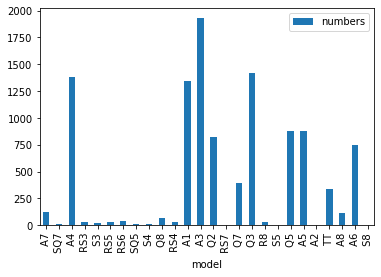

In [37]:
#un grafico de barras o histograma de frecuencias
dato.plot(kind='bar',x='model',y='numbers')


<AxesSubplot:ylabel='numbers'>

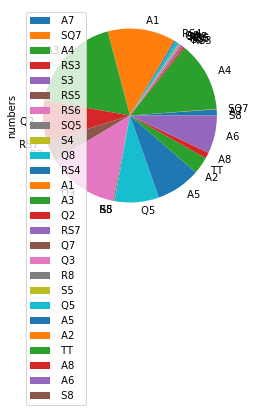

In [38]:
dato.plot.pie(y='numbers',labels=dato['model'])

In [39]:
#Podemos hacer representaciones graficar de varibles cuantitativas
pdf2 = bd5.sample(False, 0.1, 0).select('engineSize').toPandas()

<AxesSubplot:ylabel='Frequency'>

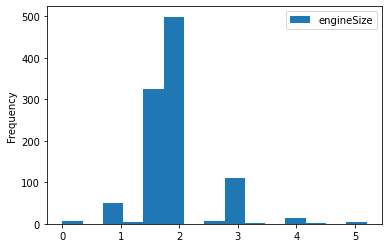

In [40]:
#histograma de frecuencias
pdf2.plot.hist(bins=15)

<AxesSubplot:>

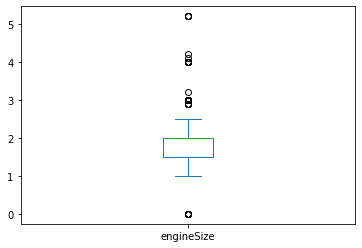

In [41]:
#diagramas de cajas o boxplot
pdf2.plot.box()

## Ahora comenzamos a realizar un analisis exploratorio de los datos

In [42]:
# Realizamos la lectura del dataframe
bd5 = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("audi.csv", inferSchema=True)
sqlContext.registerDataFrameAsTable(bd5, "bd5")

In [43]:
bd5.show(5)

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A6|2016|16500|   Automatic|  36203|  Diesel| 20|64.2|       2.0|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2017|16800|   Automatic|  25952|  Diesel|145|67.3|       2.0|
|   A3|2019|17300|      Manual|   1998|  Petrol|145|49.6|       1.0|
+-----+----+-----+------------+-------+--------+---+----+----------+
only showing top 5 rows



In [44]:
bd5.columns

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [45]:
#Ahora vamos a seleccionar algunas varibles para realizar el trabajo
bd=bd5.select('model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize'
            ) 

In [46]:
bd.show(8)

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A6|2016|16500|   Automatic|  36203|  Diesel| 20|64.2|       2.0|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2017|16800|   Automatic|  25952|  Diesel|145|67.3|       2.0|
|   A3|2019|17300|      Manual|   1998|  Petrol|145|49.6|       1.0|
|   A1|2016|13900|   Automatic|  32260|  Petrol| 30|58.9|       1.4|
|   A6|2016|13250|   Automatic|  76788|  Diesel| 30|61.4|       2.0|
|   A4|2016|11750|      Manual|  75185|  Diesel| 20|70.6|       2.0|
+-----+----+-----+------------+-------+--------+---+----+----------+
only showing top 8 rows



In [47]:
#Ahora registramos nuestro nuevo dataset como tabla
sqlContext.registerDataFrameAsTable(bd, "bd")
#Hacemos un filtro en una nueva bd donde deseamos saber en el año 2017
#que carros se vendieron con transmisión manual
bd2 = sqlContext.sql("select * from bd \
            where transmission in ('Manual') \
            and model like '_A1'")

In [48]:
#Lo registramos como tabla
sqlContext.registerDataFrameAsTable(bd2, "bd2")

In [49]:
#hacemos un show de los 10 primeros valores
bd2.show(10)

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A1|2018|15800|      Manual|  10793|  Petrol|145|56.5|       1.4|
|   A1|2017|10800|      Manual|  31447|  Petrol|145|67.3|       1.0|
|   A1|2014|11000|      Manual|  34315|  Petrol|125|53.3|       1.4|
|   A1|2013| 7000|      Manual|  76269|  Diesel|  0|74.3|       1.6|
|   A1|2017|11700|      Manual|  19268|  Petrol|150|67.3|       1.0|
|   A1|2016|10800|      Manual|  18181|  Petrol|  0|67.3|       1.0|
|   A1|2017|11300|      Manual|  29327|  Petrol| 30|55.4|       1.4|
+-----+----+-----+------------+-------+--------+---+----+----------+
only showing top 10 rows



In [50]:
bd2.count() 

983

In [51]:
bd2.select("model").distinct().count()

1

In [52]:
bd2.groupBy("model").count().show()

+-----+-----+
|model|count|
+-----+-----+
|   A1|  983|
+-----+-----+



In [53]:
#Tabla de frecuiencias
sqlContext.sql("select t1.model , t1.n , 100*t1.n/t2.t as p\
               from (select model, count(*) as n from bd2 group by model ) as t1 , \
               (select count(*) as t from bd2) as t2").show()

+-----+---+-----+
|model|  n|    p|
+-----+---+-----+
|   A1|983|100.0|
+-----+---+-----+



In [54]:
bd2.describe("mileage").show()

+-------+------------------+
|summary|           mileage|
+-------+------------------+
|  count|               983|
|   mean|28300.748728382503|
| stddev|17489.312702779855|
|    min|                10|
|    max|            116000|
+-------+------------------+



In [55]:
bd2.select('mileage').groupBy().max().collect()

[Row(max(mileage)=116000)]

In [56]:
sqlContext.sql("select min(mileage) as Min, \
                max(mileage) as Max from bd2" ).show()

+---+------+
|Min|   Max|
+---+------+
| 10|116000|
+---+------+



In [57]:
bd2.select('mileage').orderBy('mileage',ascending=False).show(10)

+-------+
|mileage|
+-------+
| 116000|
| 107000|
|  98520|
|  92760|
|  90000|
|  90000|
|  88340|
|  83390|
|  81012|
|  80814|
+-------+
only showing top 10 rows



In [58]:
#Percentiles
n=bd2.select('mileage').count()
P95=int(n*0.95)
bd2.select('mileage').sort('mileage').collect()[P95]

Row(mileage=62500)

## Representación grafica de Variables cualitativas

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
g2=sqlContext.sql("select model, count(*) as n from bd2 group by model")
pdf2=g2.toPandas()
pdf2

,model,n
0,A1,983


<AxesSubplot:xlabel='model'>

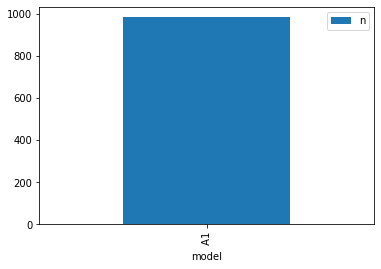

In [61]:
# Diagrama de barras verticales
pdf2.plot(kind='bar',x='model',y='n')

<AxesSubplot:ylabel='n'>

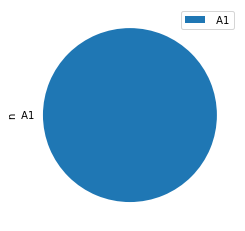

In [62]:
#digrama circular
pdf2.plot.pie(y='n',labels=pdf2['model'])

### Ahora comenzamos con el prepoceso de los datos
    * Revisión de valores anomales
    * Revisión de valores faltantes
    * Posibles inconcistencias

In [63]:
bd5.show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A6|2016|16500|   Automatic|  36203|  Diesel| 20|64.2|       2.0|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2017|16800|   Automatic|  25952|  Diesel|145|67.3|       2.0|
|   A3|2019|17300|      Manual|   1998|  Petrol|145|49.6|       1.0|
|   A1|2016|13900|   Automatic|  32260|  Petrol| 30|58.9|       1.4|
|   A6|2016|13250|   Automatic|  76788|  Diesel| 30|61.4|       2.0|
|   A4|2016|11750|      Manual|  75185|  Diesel| 20|70.6|       2.0|
|   A3|2015|10200|      Manual|  46112|  Petrol| 20|60.1|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A3|2017|16100|      Manual|  28955|  Petrol|145|58.9|       1.4|
|   A6|2016|16500|   Automatic|  5

In [64]:
bd3 = bd5.filter( bd5.year.isin('2017'))
bd3.show(5)

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A4|2017|16800|   Automatic|  25952|  Diesel|145|67.3|       2.0|
|   A3|2017|16100|      Manual|  28955|  Petrol|145|58.9|       1.4|
|   A3|2017|16400|      Manual|  21695|  Petrol| 30|58.9|       1.4|
|   A3|2017|14500|   Automatic|  26156|  Petrol|145|58.9|       1.4|
+-----+----+-----+------------+-------+--------+---+----+----------+
only showing top 5 rows



In [65]:
sqlContext.registerDataFrameAsTable(bd3, "bd3")

In [66]:
bd3.describe('mileage').show()

+-------+------------------+
|summary|           mileage|
+-------+------------------+
|  count|              1935|
|   mean|26841.214470284238|
| stddev|13521.278960283946|
|    min|              1420|
|    max|            111890|
+-------+------------------+



In [67]:
bd3.describe().show()

+-------+-----+------+------------------+------------+------------------+--------+------------------+------------------+------------------+
|summary|model|  year|             price|transmission|           mileage|fuelType|               tax|               mpg|        engineSize|
+-------+-----+------+------------------+------------+------------------+--------+------------------+------------------+------------------+
|  count| 1935|  1935|              1935|        1935|              1935|    1935|              1935|              1935|              1935|
|   mean| null|2017.0|19951.624289405685|        null|26841.214470284238|    null|123.17054263565892| 55.87689922480607| 1.833540051679602|
| stddev| null|   0.0|  7282.24289104866|        null|13521.278960283946|    null| 57.35385059741576|10.135594598606204|0.6130657911211629|
|    min|   A1|  2017|              8490|   Automatic|              1420|  Diesel|                 0|              28.2|               0.0|
|    max|   TT|  201

In [68]:
bd3.describe().toPandas().set_index('summary').transpose()

summary,count,mean,stddev,min,max
model,1935,None,None,A1,TT
year,1935,2017.0,0.0,2017,2017
price,1935,19951.624289405685,7282.24289104866,8490,61700
transmission,1935,None,None,Automatic,Semi-Auto
mileage,1935,26841.214470284238,13521.278960283946,1420,111890
fuelType,1935,None,None,Diesel,Petrol
tax,1935,123.17054263565892,57.35385059741576,0,555
mpg,1935,55.87689922480607,10.135594598606204,28.2,156.9
engineSize,1935,1.833540051679602,0.6130657911211629,0.0,4.0


In [69]:
#VAlores faltantes en la bd
bd3.describe().toPandas().transpose()[0]

summary         count
model            1935
year             1935
price            1935
transmission     1935
mileage          1935
fuelType         1935
tax              1935
mpg              1935
engineSize       1935
Name: 0, dtype: object

In [70]:
"""
En este caso nuestra bd está bastante limpia y completa por lo que 
no aparacen datos faltantes
"""


'\nEn este caso nuestra bd está bastante limpia y completa por lo que \nno aparacen datos faltantes\n'

In [71]:
# Variable continua vs cualitativa
g3 = sqlContext.sql("select model, count(*) as n, \
               avg(mileage) as Mean, \
               stddev(mileage) as Std \
               from bd5 group by model")
g3.show()

+-----+----+------------------+------------------+
|model|   n|              Mean|               Std|
+-----+----+------------------+------------------+
|   A7| 122| 27480.94262295082|23631.067911746464|
|  SQ7|   8|         27659.375| 9875.330836230247|
|   A4|1381|29690.989862418537| 26935.24225323539|
|  RS3|  33|25870.545454545456|22311.476762379083|
|   S3|  18| 40500.72222222222|22728.814142626652|
|  RS5|  29|11572.758620689656|15444.172131665468|
|  RS6|  39|28524.641025641027|16962.171195257404|
|  SQ5|  16|         42114.875| 29890.76161597983|
|   S4|  12|27117.666666666668| 36101.01952308356|
|   Q8|  69|  6412.04347826087|4057.1046486915743|
|  RS4|  31|  21743.8064516129|23142.374956515527|
|   A1|1347|24498.288047512993| 17963.97099794573|
|   A3|1929| 28891.08709175739|25485.110901942717|
|   Q2| 822|10797.816301703164|11029.319190422242|
|  RS7|   1|           56000.0|              null|
|   Q7| 397|  21672.7556675063|21169.404047242406|
|   Q3|1417|21194.870853916724|

In [72]:
g4 = g3.dropna()

In [73]:
g4.show()

+-----+----+------------------+------------------+
|model|   n|              Mean|               Std|
+-----+----+------------------+------------------+
|   A7| 122| 27480.94262295082|23631.067911746464|
|  SQ7|   8|         27659.375| 9875.330836230247|
|   A4|1381|29690.989862418537| 26935.24225323539|
|  RS3|  33|25870.545454545456|22311.476762379083|
|   S3|  18| 40500.72222222222|22728.814142626652|
|  RS5|  29|11572.758620689656|15444.172131665468|
|  RS6|  39|28524.641025641027|16962.171195257404|
|  SQ5|  16|         42114.875| 29890.76161597983|
|   S4|  12|27117.666666666668| 36101.01952308356|
|   Q8|  69|  6412.04347826087|4057.1046486915743|
|  RS4|  31|  21743.8064516129|23142.374956515527|
|   A1|1347|24498.288047512993| 17963.97099794573|
|   A3|1929| 28891.08709175739|25485.110901942717|
|   Q2| 822|10797.816301703164|11029.319190422242|
|   Q7| 397|  21672.7556675063|21169.404047242406|
|   Q3|1417|21194.870853916724|19500.140969673103|
|   R8|  28|           12363.0|

<AxesSubplot:xlabel='model'>

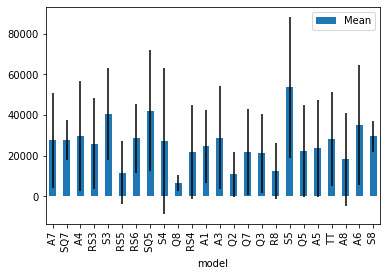

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
pdf3=g4.toPandas()
pdf3.plot(kind='bar',x='model',y='Mean',yerr='Std')

In [75]:
pdf4 = bd5.sample(False, 0.1, 0).select('model','mileage','year','price','transmission','fueltype').toPandas()
pdf4[1:10]

,model,mileage,year,price,transmission,fueltype
1,A1,22451,2016,12000,Manual,Petrol
2,Q3,28396,2016,15700,Automatic,Diesel
3,A5,33300,2017,19500,Automatic,Diesel
4,A6,22958,2018,16600,Automatic,Petrol
5,A1,34315,2014,11000,Manual,Petrol
6,A3,66369,2016,10200,Manual,Diesel
7,A4,97440,2016,10200,Manual,Diesel
8,A5,20052,2017,18700,Manual,Petrol
9,A6,24744,2016,15500,Automatic,Diesel


<AxesSubplot:xlabel='model', ylabel='mileage'>

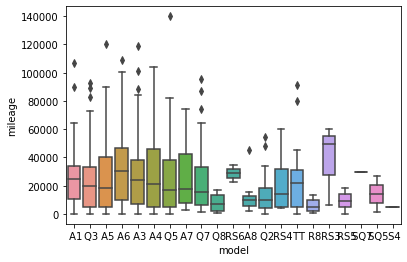

In [76]:
import seaborn as sns 

sns.boxplot(x='model',y='mileage',data=pdf4)

<AxesSubplot:xlabel='model', ylabel='mileage'>

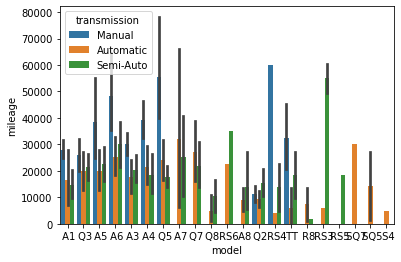

In [77]:
sns.barplot(x="model", y="mileage", hue="transmission", data=pdf4)

<AxesSubplot:xlabel='model', ylabel='mileage'>

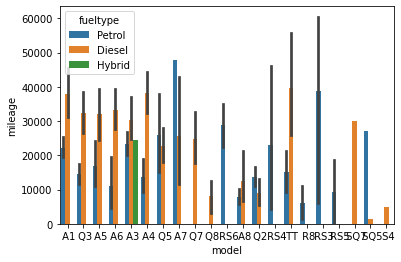

In [78]:
sns.barplot(x="model", y="mileage", hue="fueltype", data=pdf4)

### Cualitativa  vs Cualitativa


In [79]:
#Realizamos una consulta sql, seleccionando las información deseada
pdf6 = sqlContext.sql("select model, transmission, count(*) as n \
               from bd5 group by model,  transmission \
               order by model,  transmission").toPandas()
pdf6

,model,transmission,n
0,A1,Automatic,97
1,A1,Manual,983
2,A1,Semi-Auto,267
3,A2,Manual,1
4,A3,Automatic,304
...,...,...,...
56,SQ7,Automatic,7
57,SQ7,Semi-Auto,1
58,TT,Automatic,58
59,TT,Manual,182


<AxesSubplot:xlabel='model', ylabel='n'>

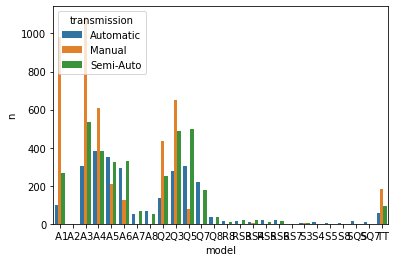

In [80]:
sns.barplot(x="model", y="n", hue="transmission", data=pdf6)

<AxesSubplot:xlabel='model', ylabel='avg(mileage)'>

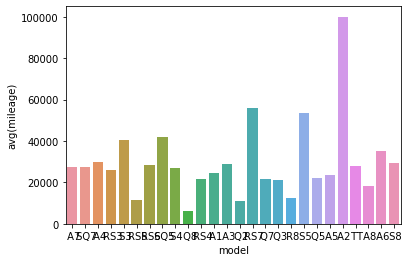

In [81]:
pdf7 = bd5.groupBy('model').mean('mileage').toPandas()
sns.barplot(x="model", y= "avg(mileage)", data=pdf7)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


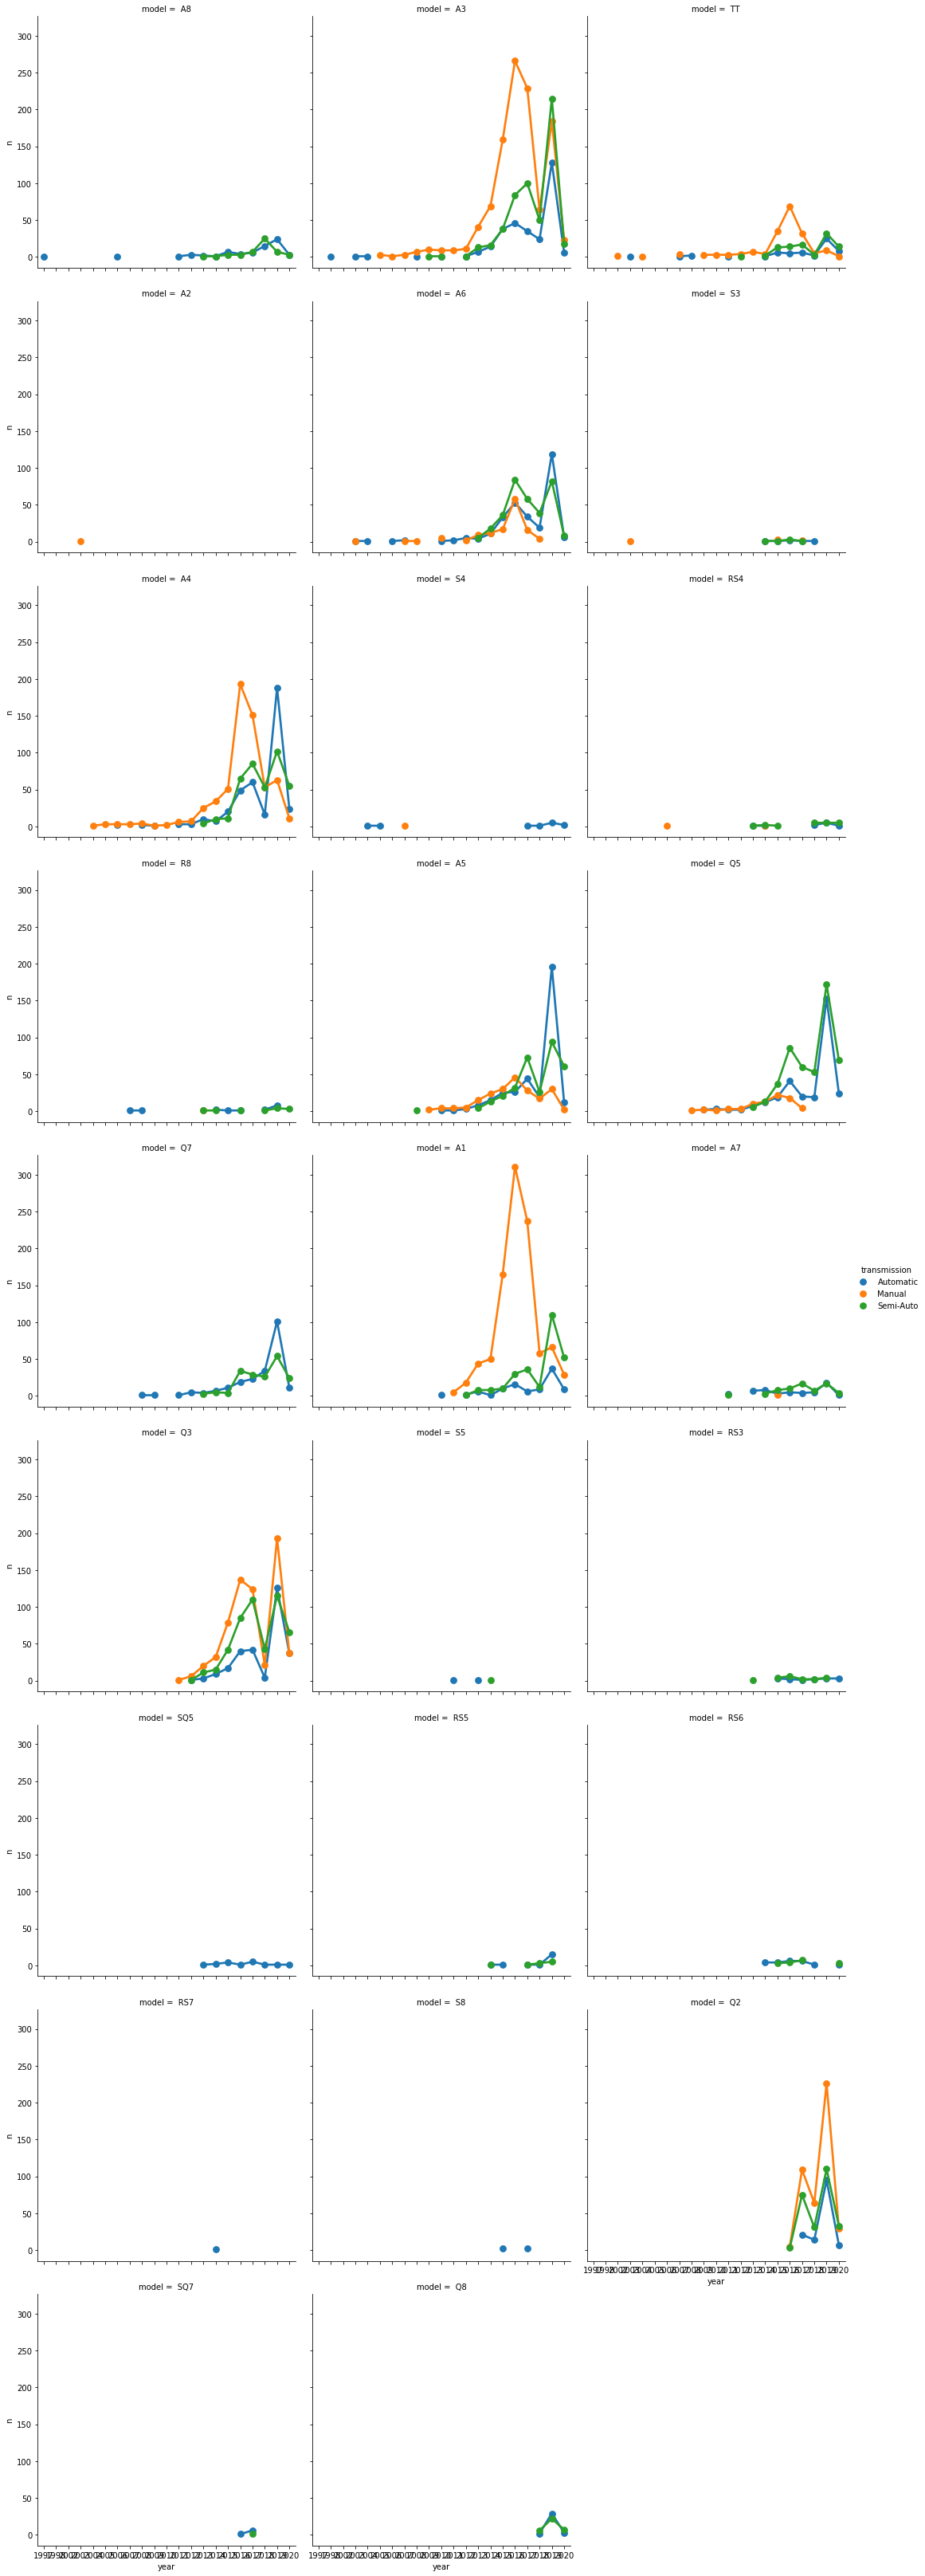

In [82]:
pdf8 = sqlContext.sql("select year, model, transmission, count(*) as n \
               from bd5 group by  year, model, transmission \
               order by  year, model, transmission").toPandas()

sns.factorplot(x="year", y="n", col="model", hue="transmission", data=pdf8, col_wrap=3,)

## Variable continua vs continua


In [83]:
bd5.corr('mpg','mileage')

0.39510336897281695

In [84]:
pdf4.corr()


,mileage,year,price
mileage,1.000000,-0.813246,-0.504513
year,-0.813246,1.000000,0.583965
price,-0.504513,0.583965,1.000000


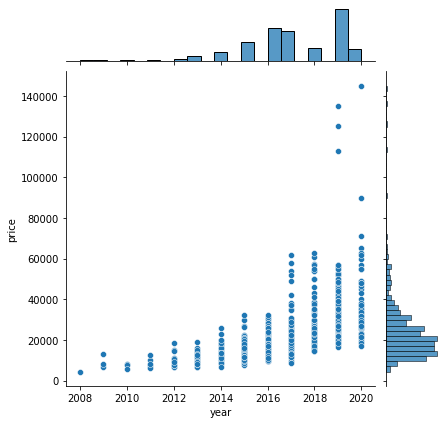

In [85]:
sns.jointplot(x="year", y="price", data=pdf4)

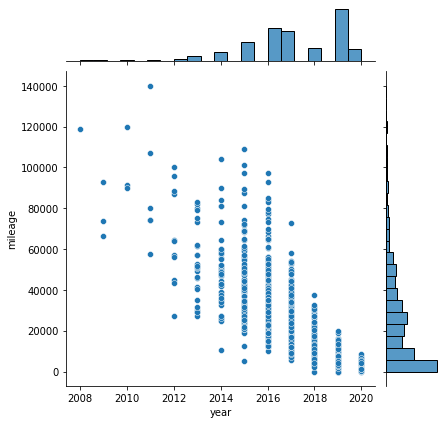

In [86]:
sns.jointplot(x="year", y="mileage", data=pdf4)

### Ahora haremos una regresión lineal

In [87]:
#hacemos la lectura de nuestro dataset
bd5 = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("audi.csv", inferSchema=True)
sqlContext.registerDataFrameAsTable(bd5, "bd5")

In [88]:
bd5.columns

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [89]:
pdf4 = bd5.sample(False, 0.1, 0).select('model','year','price','transmission','mileage','tax','mpg', 'engineSize').toPandas()
pdf4.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.583965,-0.813246,0.188819,-0.445088,0.047624
price,0.583965,1.000000,-0.504513,0.332986,-0.625900,0.641844
mileage,-0.813246,-0.504513,1.000000,-0.163762,0.414697,0.039397
tax,0.188819,0.332986,-0.163762,1.000000,-0.675543,0.341454
mpg,-0.445088,-0.625900,0.414697,-0.675543,1.000000,-0.376746
engineSize,0.047624,0.641844,0.039397,0.341454,-0.376746,1.000000


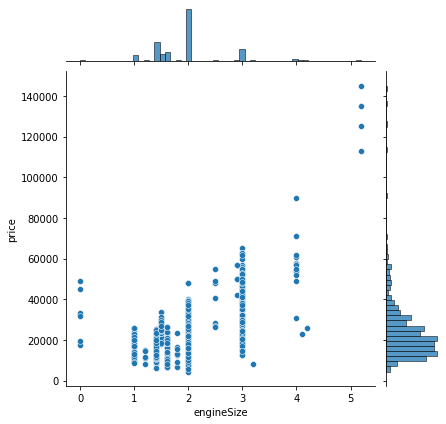

In [90]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x="engineSize", y="price", data=pdf4)

In [91]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

assembler = VectorAssembler(
    inputCols=['price'],
    outputCol='features')

bd6 = assembler.transform(bd5).select(col("engineSize").alias("label"),'features')
bd6.show()

+-----+---------+
|label| features|
+-----+---------+
|  1.4|[12500.0]|
|  2.0|[16500.0]|
|  1.4|[11000.0]|
|  2.0|[16800.0]|
|  1.0|[17300.0]|
|  1.4|[13900.0]|
|  2.0|[13250.0]|
|  2.0|[11750.0]|
|  1.4|[10200.0]|
|  1.4|[12000.0]|
|  1.4|[16100.0]|
|  2.0|[16500.0]|
|  2.0|[17000.0]|
|  1.4|[16400.0]|
|  2.0|[15400.0]|
|  1.4|[14500.0]|
|  2.0|[15700.0]|
|  1.4|[13900.0]|
|  2.0|[19000.0]|
|  1.4|[17000.0]|
+-----+---------+
only showing top 20 rows



In [92]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
model = lr.fit(bd6)
pred = model.transform(bd6)

21/12/17 23:40:22 WARN Instrumentation: [1d0bf971] regParam is zero, which might cause numerical instability and overfitting.
21/12/17 23:40:22 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
21/12/17 23:40:22 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
21/12/17 23:40:22 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [93]:
print(model.intercept,model.coefficients)

1.2339185316214902 [3.043192185234333e-05]


#### EL MODELO PREDICTIVO QUEDARIA
    - engineSize = 1.234 + 3.043192*price + error


In [94]:
pred = pred.withColumn('residual', pred.label-pred.prediction)
pred.show()

+-----+---------+------------------+--------------------+
|label| features|        prediction|            residual|
+-----+---------+------------------+--------------------+
|  1.4|[12500.0]|1.6143175547757818|-0.21431755477578185|
|  2.0|[16500.0]|1.7360452421851553|  0.2639547578148447|
|  1.4|[11000.0]|1.5686696719972668| -0.1686696719972669|
|  2.0|[16800.0]|1.7451748187408582|  0.2548251812591418|
|  1.0|[17300.0]|1.7603907796670297| -0.7603907796670297|
|  1.4|[13900.0]|1.6569222453690626| -0.2569222453690627|
|  2.0|[13250.0]|1.6371414961650395| 0.36285850383496054|
|  2.0|[11750.0]|1.5914936133865243|  0.4085063866134757|
|  1.4|[10200.0]|1.5443241345153922|-0.14432413451539228|
|  1.4|[12000.0]|1.5991015938496103|-0.19910159384961035|
|  1.4|[16100.0]| 1.723872473444218|  -0.323872473444218|
|  2.0|[16500.0]|1.7360452421851553|  0.2639547578148447|
|  2.0|[17000.0]|1.7512612031113268| 0.24873879688867317|
|  1.4|[16400.0]|1.7330020499999208| -0.3330020499999209|
|  2.0|[15400.

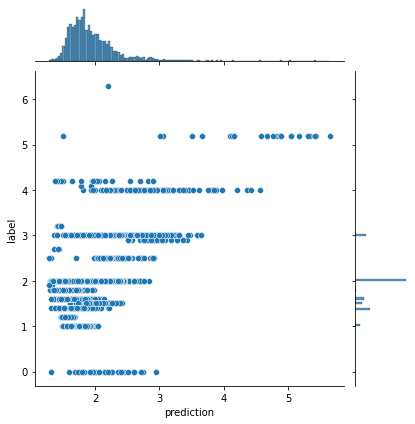

In [95]:
pdpred = pred.toPandas()
sns.jointplot(x="prediction", y="label", data=pdpred)

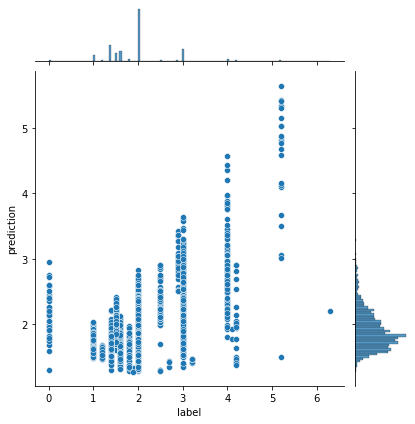

In [96]:
#haciendo intercambio de variables
sns.jointplot(x="label", y="prediction", data=pdpred)

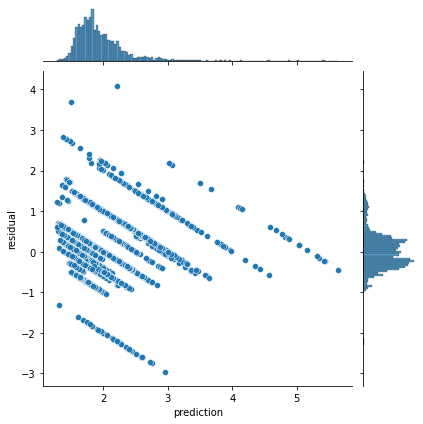

In [97]:
sns.jointplot(x="prediction", y="residual", data=pdpred)

In [98]:
from pyspark.ml.evaluation import RegressionEvaluator

print(RegressionEvaluator(metricName="rmse").evaluate(pred))
print(RegressionEvaluator(metricName="r2").evaluate(pred))

0.4862495857473535
0.34959033035574005


## Creación de varibles nuevas o feature extration

In [99]:
bd5 = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("audi.csv", inferSchema=True)
sqlContext.registerDataFrameAsTable(bd5, "bd5")

In [100]:
# Variables Dummy 
bd5 = bd5.withColumn('Automatic',(bd5.transmission=='Automatic') 
).withColumn('Manual',(bd5.transmission=='Manual'))

In [101]:
d2=bd5.toPandas()
d2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Automatic,Manual
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,False,True
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,True,False
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,False,True
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,True,False
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,False,True
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,False,True
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,False,True
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,True,False


In [102]:
# Variables discretizadas binarias
from pyspark.ml.feature import Binarizer
binarizer = Binarizer(threshold=1.0, inputCol='engineSize', outputCol='SalidaBin')
binarizer.transform(bd5).head()

Row(model=' A1', year=2017, price=12500, transmission='Manual', mileage=15735, fuelType='Petrol', tax=150, mpg=55.4, engineSize=1.4, Automatic=False, Manual=True, SalidaBin=1.0)

In [103]:
binarizer.transform(bd5).select('engineSize','SalidaBin').show()

+----------+---------+
|engineSize|SalidaBin|
+----------+---------+
|       1.4|      1.0|
|       2.0|      1.0|
|       1.4|      1.0|
|       2.0|      1.0|
|       1.0|      0.0|
|       1.4|      1.0|
|       2.0|      1.0|
|       2.0|      1.0|
|       1.4|      1.0|
|       1.4|      1.0|
|       1.4|      1.0|
|       2.0|      1.0|
|       2.0|      1.0|
|       1.4|      1.0|
|       2.0|      1.0|
|       1.4|      1.0|
|       2.0|      1.0|
|       1.4|      1.0|
|       2.0|      1.0|
|       1.4|      1.0|
+----------+---------+
only showing top 20 rows



In [104]:
# VAriables discretizadas en buckets
from pyspark.ml.feature import Bucketizer
bucketizer = Bucketizer(splits=[-float("inf"), 1.0,1.4, float("inf")],
                        inputCol='engineSize', outputCol='SalidaCat')
bucketizer.transform(bd5).select('engineSize','SalidaCat').show()

+----------+---------+
|engineSize|SalidaCat|
+----------+---------+
|       1.4|      2.0|
|       2.0|      2.0|
|       1.4|      2.0|
|       2.0|      2.0|
|       1.0|      1.0|
|       1.4|      2.0|
|       2.0|      2.0|
|       2.0|      2.0|
|       1.4|      2.0|
|       1.4|      2.0|
|       1.4|      2.0|
|       2.0|      2.0|
|       2.0|      2.0|
|       1.4|      2.0|
|       2.0|      2.0|
|       1.4|      2.0|
|       2.0|      2.0|
|       1.4|      2.0|
|       2.0|      2.0|
|       1.4|      2.0|
+----------+---------+
only showing top 20 rows



In [105]:
#Expansión polinomica de las variables
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PolynomialExpansion

assembler = VectorAssembler(
    inputCols=['engineSize','mpg'],
    outputCol='features')

px = PolynomialExpansion(
    degree=2, 
    inputCol="features", 
    outputCol="Polyn")

bd6 = px.transform(assembler.transform(bd5))

bd6.select('engineSize','mpg','Polyn').head(5)

[Row(engineSize=1.4, mpg=55.4, Polyn=DenseVector([1.4, 1.96, 55.4, 77.56, 3069.16])),
 Row(engineSize=2.0, mpg=64.2, Polyn=DenseVector([2.0, 4.0, 64.2, 128.4, 4121.64])),
 Row(engineSize=1.4, mpg=55.4, Polyn=DenseVector([1.4, 1.96, 55.4, 77.56, 3069.16])),
 Row(engineSize=2.0, mpg=67.3, Polyn=DenseVector([2.0, 4.0, 67.3, 134.6, 4529.29])),
 Row(engineSize=1.0, mpg=49.6, Polyn=DenseVector([1.0, 1.0, 49.6, 49.6, 2460.16]))]

In [106]:
#TAmbien  podemos hacer una estandarización de variables
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="stdfeatures",
                        withStd=True, withMean=True)
scalerModel = scaler.fit(bd6)
bd6std = scalerModel.transform(bd6)

bd6std.select('features','stdfeatures').show()


+----------+--------------------+
|  features|         stdfeatures|
+----------+--------------------+
|[1.4,55.4]|[-0.8801771097229...|
|[2.0,64.2]|[0.11491926655135...|
|[1.4,55.4]|[-0.8801771097229...|
|[2.0,67.3]|[0.11491926655135...|
|[1.0,49.6]|[-1.5435746939057...|
|[1.4,58.9]|[-0.8801771097229...|
|[2.0,61.4]|[0.11491926655135...|
|[2.0,70.6]|[0.11491926655135...|
|[1.4,60.1]|[-0.8801771097229...|
|[1.4,55.4]|[-0.8801771097229...|
|[1.4,58.9]|[-0.8801771097229...|
|[2.0,57.6]|[0.11491926655135...|
|[2.0,52.3]|[0.11491926655135...|
|[1.4,58.9]|[-0.8801771097229...|
|[2.0,61.4]|[0.11491926655135...|
|[1.4,58.9]|[-0.8801771097229...|
|[2.0,53.3]|[0.11491926655135...|
|[1.4,56.5]|[-0.8801771097229...|
|[2.0,47.1]|[0.11491926655135...|
|[1.4,47.9]|[-0.8801771097229...|
+----------+--------------------+
only showing top 20 rows



### Regresión multipe



In [78]:
#Realizamos la lectura de nuestro dataframe
bd5 = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("audi.csv", inferSchema=True)
sqlContext.registerDataFrameAsTable(bd5, "bd5")

In [108]:
#hacemos nuestra transformación
bd5 = bd5.withColumn('Automatic',(bd5.transmission=='Automatic') 
).withColumn('Manual',(bd5.transmission=='Manual'))

bd5 = bd5.withColumn('mpg2',(bd5.mpg**2)
).withColumn('mpg_mileage',(bd5.mpg * bd5.mileage))


In [109]:
pdf7 = bd5.sample(False, 0.1, 0).select('price','mpg','mileage','engineSize','mpg2','mpg_mileage').toPandas()
pdf7.corr()

,price,mpg,mileage,engineSize,mpg2,mpg_mileage
price,1.000000,-0.625900,-0.504513,0.641844,-0.483100,-0.543287
mpg,-0.625900,1.000000,0.414697,-0.376746,0.937195,0.607405
mileage,-0.504513,0.414697,1.000000,0.039397,0.339876,0.952638
engineSize,0.641844,-0.376746,0.039397,1.000000,-0.282691,-0.046114
mpg2,-0.483100,0.937195,0.339876,-0.282691,1.000000,0.531803
mpg_mileage,-0.543287,0.607405,0.952638,-0.046114,0.531803,1.000000


In [110]:
#hacemos la configuración para el modelo usando Vector assembres
from pyspark.ml.feature import VectorAssembler

a1  = VectorAssembler(
    inputCols=['mpg','mileage','engineSize','mpg2','mpg_mileage'],
    outputCol='features')
bd6 = a1.transform(bd5)

In [111]:
from pyspark.sql.functions import col

bd6 = bd6.select(col('price').cast("double").alias("label"),'features')
bd6.show()

+-------+--------------------+
|  label|            features|
+-------+--------------------+
|12500.0|[55.4,15735.0,1.4...|
|16500.0|[64.2,36203.0,2.0...|
|11000.0|[55.4,29946.0,1.4...|
|16800.0|[67.3,25952.0,2.0...|
|17300.0|[49.6,1998.0,1.0,...|
|13900.0|[58.9,32260.0,1.4...|
|13250.0|[61.4,76788.0,2.0...|
|11750.0|[70.6,75185.0,2.0...|
|10200.0|[60.1,46112.0,1.4...|
|12000.0|[55.4,22451.0,1.4...|
|16100.0|[58.9,28955.0,1.4...|
|16500.0|[57.6,52198.0,2.0...|
|17000.0|[52.3,44915.0,2.0...|
|16400.0|[58.9,21695.0,1.4...|
|15400.0|[61.4,47348.0,2.0...|
|14500.0|[58.9,26156.0,1.4...|
|15700.0|[53.3,28396.0,2.0...|
|13900.0|[56.5,30516.0,1.4...|
|19000.0|[47.1,37652.0,2.0...|
|17000.0|[47.9,34110.0,1.4...|
+-------+--------------------+
only showing top 20 rows



In [112]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lr = LinearRegression()
model = lr.fit(bd6)
pred = model.transform(bd6)

21/12/17 23:41:09 WARN Instrumentation: [def68e4c] regParam is zero, which might cause numerical instability and overfitting.


In [113]:
print(model.intercept,model.coefficients)

38078.1213570845 [-710.6205583051158,-0.5087243264110249,9701.046274454855,2.6668306836473823,0.0054144619851148644]


In [114]:
pred = pred.withColumn('residual', pred.label-pred.prediction)
pred.show()

+-------+--------------------+------------------+-------------------+
|  label|            features|        prediction|           residual|
+-------+--------------------+------------------+-------------------+
|12500.0|[55.4,15735.0,1.4...|17191.249383365946| -4691.249383365946|
|16500.0|[64.2,36203.0,2.0...|17017.212349960526| -517.2123499605259|
|11000.0|[55.4,29946.0,1.4...|14224.516508322766|-3224.5165083227657|
|16800.0|[67.3,25952.0,2.0...|17988.620863735523| -1188.620863735523|
|17300.0|[49.6,1998.0,1.0,...|18613.364424412805|-1313.3644244128045|
|13900.0|[58.9,32260.0,1.4...|12932.479183531195|  967.5208164688047|
|13250.0|[61.4,76788.0,2.0...|10366.047458191813| 2883.9525418081867|
|11750.0|[70.6,75185.0,2.0...|11094.702693955587|  655.2973060444128|
|10200.0|[60.1,46112.0,1.4...|10130.880975922591|  69.11902407740854|
|12000.0|[55.4,22451.0,1.4...|15789.196185928049| -3789.196185928049|
|16100.0|[58.9,28955.0,1.4...| 13559.80954721824| 2540.1904527817605|
|16500.0|[57.6,52198

In [115]:
from pyspark.ml.evaluation import RegressionEvaluator

print(RegressionEvaluator(metricName="rmse").evaluate(pred))
print(RegressionEvaluator(metricName="mae").evaluate(pred))
print(RegressionEvaluator(metricName="r2").evaluate(pred))

5685.795047632258
3600.7256267808357
0.7644135809733885


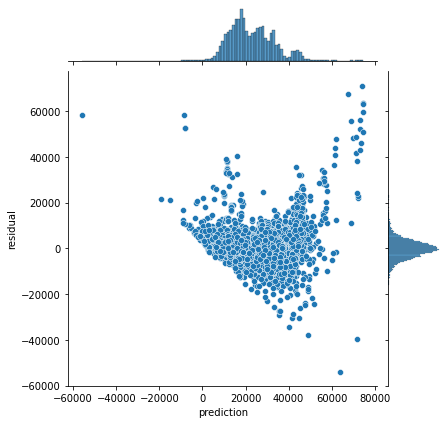

In [116]:
import seaborn as sns
%matplotlib inline

pdpred = pred.toPandas()
sns.jointplot(x="prediction", y="residual", data=pdpred)

In [117]:
#haciendo uso del ridge regression
lr = LinearRegression(
    maxIter=5, 
    regParam=5.0,
    elasticNetParam=0.0,
    solver="normal")
model = lr.fit(bd6)
pred = model.transform(bd6)

In [118]:
print(model.intercept,model.coefficients)
print(RegressionEvaluator(metricName="r2").evaluate(pred))

37866.17706022484 [-705.8565016188038,-0.5030778398867263,9703.984786003044,2.656607107903405,0.005307474958186408]
0.7644029953157601


In [119]:
bd6.select('features').dtypes

[('features', 'vector')]

In [120]:
#haciendo uso del lasso regressión
lr = LinearRegression(
    maxIter=5, 
    regParam=0.7,
    elasticNetParam=1.0,
    solver="auto")
model = lr.fit(bd6)
pred = model.transform(bd6)

In [121]:
print(model.intercept,model.coefficients)
print(RegressionEvaluator(metricName="r2").evaluate(pred))

17781.907755651042 [-195.94336465766645,-0.18841161757047212,11129.114193303652,0.0,-0.001264914678975532]
0.6927584791494288


In [122]:
#estandariazación 
lr = LinearRegression(
    maxIter=5, 
    regParam=1.0,
    elasticNetParam=1.0,
    solver="auto",
    standardization=True,
    featuresCol = "features" ) 
model = lr.fit(bd6)
pred = model.transform(bd6)
print(model.intercept,model.coefficients)
print(RegressionEvaluator(metricName="r2").evaluate(pred))

17782.279471699843 [-195.9389247665625,-0.18840232973626164,11128.659680047342,0.0,-0.001264878602537518]
0.6927631613958447


In [123]:
lr2 = LinearRegression(
    maxIter=5, 
    regParam=0.7,
    elasticNetParam=1.0,
    solver="auto",
    standardization=False,
    featuresCol = "features" ) 
model = lr2.fit(bd6)
pred = model.transform(bd6)
print(model.intercept,model.coefficients)
print(RegressionEvaluator(metricName="r2").evaluate(pred))

17785.288948781494 [-195.9626490494236,-0.18842484966384143,11128.05414266062,0.0,-0.0012649342039344408]
0.6927573382779706


<AxesSubplot:xlabel='mileage', ylabel='price'>

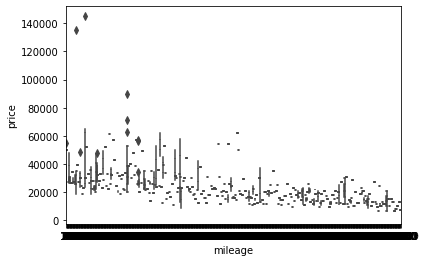

In [135]:
#Ahora probaremos con una regresión logistica
import seaborn as sns
%matplotlib inline

sns.boxplot(x='mileage',y='price',data=pdf7)

## Ahora vamos a realizar la practica de algunas agregaciones

In [81]:
#haciendo uso del approx_count_distinc()
from pyspark.sql.functions import approx_count_distinct

b1 = bd5.agg(approx_count_distinct(bd5.model).alias('distinct_models')).collect()

In [38]:
#haciendo uSo del Avg
from pyspark.sql.functions import avg
b2 = bd5.agg(avg(bd5.price).alias('avg_price')).take(5)

In [47]:
#collect list
from pyspark.sql.functions import collect_list
b3 = bd5.select(collect_list("model")).show()

+--------------------+
| collect_list(model)|
+--------------------+
|[ A1,  A6,  A1,  ...|
+--------------------+



In [48]:
#collect set
from pyspark.sql.functions import collect_set
b4 = bd5.select(collect_set("price")).show()

+--------------------+
|  collect_set(price)|
+--------------------+
|[47949, 85900, 30...|
+--------------------+



In [52]:
#Count distinc 
from pyspark.sql.functions import countDistinct
b4 = bd5.select(countDistinct("model","engineSize", "fuelType"))
b4.show()

+-------------------------------------------+
|count(DISTINCT model, engineSize, fuelType)|
+-------------------------------------------+
|                                        119|
+-------------------------------------------+



In [70]:
#count 
from pyspark.sql.functions import count
b6 = bd5.select(count("model")).show()


+------------+
|count(model)|
+------------+
|       10668|
+------------+



## alternativamente
 `bd5.select("model").count()`

In [79]:
#alternativamente
bd5.select("model").count()


10668

In [80]:
bd5.show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|  15735|  Petrol|150|55.4|       1.4|
|   A6|2016|16500|   Automatic|  36203|  Diesel| 20|64.2|       2.0|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A4|2017|16800|   Automatic|  25952|  Diesel|145|67.3|       2.0|
|   A3|2019|17300|      Manual|   1998|  Petrol|145|49.6|       1.0|
|   A1|2016|13900|   Automatic|  32260|  Petrol| 30|58.9|       1.4|
|   A6|2016|13250|   Automatic|  76788|  Diesel| 30|61.4|       2.0|
|   A4|2016|11750|      Manual|  75185|  Diesel| 20|70.6|       2.0|
|   A3|2015|10200|      Manual|  46112|  Petrol| 20|60.1|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A3|2017|16100|      Manual|  28955|  Petrol|145|58.9|       1.4|
|   A6|2016|16500|   Automatic|  5

In [82]:
bd5.sort("model").show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|11300|      Manual|  29327|  Petrol| 30|55.4|       1.4|
|   A1|2019|19685|      Manual|     10|  Petrol|145|49.6|       1.0|
|   A1|2014|10000|      Manual|  28324|  Petrol|125|53.3|       1.4|
|   A1|2016|11000|      Manual|  29946|  Petrol| 30|55.4|       1.4|
|   A1|2016|14500|      Manual|  12100|  Petrol| 30|56.5|       1.4|
|   A1|2016|12000|      Manual|  22451|  Petrol| 30|55.4|       1.4|
|   A1|2016|10600|      Manual|  28760|  Petrol| 30|55.4|       1.4|
|   A1|2015| 9500|   Automatic|  54754|  Diesel|  0|76.3|       1.6|
|   A1|2017|14000|      Manual|  12577|  Petrol| 30|58.9|       1.4|
|   A1|2014|11000|      Manual|  34315|  Petrol|125|53.3|       1.4|
|   A1|2016|10600|      Manual|  15567|  Diesel|  0|76.3|       1.6|
|   A1|2017|11700|      Manual|  1

In [4]:
#casteo de variables( no es recomendable)
from pyspark.sql.types import DoubleType, IntegerType, StringType
from pyspark.sql import functions as F
bd5 = bd5.withColumn('mileage', F.col('mileage').cast(DoubleType()))
bd5.show()

+-----+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+---+----+----------+
|   A1|2017|12500|      Manual|15735.0|  Petrol|150|55.4|       1.4|
|   A6|2016|16500|   Automatic|36203.0|  Diesel| 20|64.2|       2.0|
|   A1|2016|11000|      Manual|29946.0|  Petrol| 30|55.4|       1.4|
|   A4|2017|16800|   Automatic|25952.0|  Diesel|145|67.3|       2.0|
|   A3|2019|17300|      Manual| 1998.0|  Petrol|145|49.6|       1.0|
|   A1|2016|13900|   Automatic|32260.0|  Petrol| 30|58.9|       1.4|
|   A6|2016|13250|   Automatic|76788.0|  Diesel| 30|61.4|       2.0|
|   A4|2016|11750|      Manual|75185.0|  Diesel| 20|70.6|       2.0|
|   A3|2015|10200|      Manual|46112.0|  Petrol| 20|60.1|       1.4|
|   A1|2016|12000|      Manual|22451.0|  Petrol| 30|55.4|       1.4|
|   A3|2017|16100|      Manual|28955.0|  Petrol|145|58.9|       1.4|
|   A6|2016|16500|   Automatic|521

In [23]:
df7 = bd5.groupBy("model")
df7.agg({'mileage': 'sum'}).show()

+-----+------------+
|model|sum(mileage)|
+-----+------------+
|   A7|   3352675.0|
|  SQ7|    221275.0|
|   A4| 4.1003257E7|
|  RS3|    853728.0|
|   S3|    729013.0|
|  RS5|    335610.0|
|  RS6|   1112461.0|
|  SQ5|    673838.0|
|   S4|    325412.0|
|   Q8|    442431.0|
|  RS4|    674058.0|
|   A1| 3.2999194E7|
|   A3| 5.5730907E7|
|   Q2|   8875805.0|
|  RS7|     56000.0|
|   Q7|   8604084.0|
|   Q3| 3.0033132E7|
|   R8|    346164.0|
|   S5|    160820.0|
|   Q5| 1.9573112E7|
+-----+------------+
only showing top 20 rows



In [27]:
#ahora procederemos a hacer un par de joins
bmw_set  = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("bmw.csv", inferschema = True)
bmw_set.show()

+---------+----+-----+------------+-------+--------+---+-----+----------+
|    model|year|price|transmission|mileage|fuelType|tax|  mpg|engineSize|
+---------+----+-----+------------+-------+--------+---+-----+----------+
| 5 Series|2014|11200|   Automatic|  67068|  Diesel|125| 57.6|       2.0|
| 6 Series|2018|27000|   Automatic|  14827|  Petrol|145| 42.8|       2.0|
| 5 Series|2016|16000|   Automatic|  62794|  Diesel|160| 51.4|       3.0|
| 1 Series|2017|12750|   Automatic|  26676|  Diesel|145| 72.4|       1.5|
| 7 Series|2014|14500|   Automatic|  39554|  Diesel|160| 50.4|       3.0|
| 5 Series|2016|14900|   Automatic|  35309|  Diesel|125| 60.1|       2.0|
| 5 Series|2017|16000|   Automatic|  38538|  Diesel|125| 60.1|       2.0|
| 2 Series|2018|16250|      Manual|  10401|  Petrol|145| 52.3|       1.5|
| 4 Series|2017|14250|      Manual|  42668|  Diesel| 30| 62.8|       2.0|
| 5 Series|2016|14250|   Automatic|  36099|  Diesel| 20| 68.9|       2.0|
|       X3|2017|15500|      Manual|  7

In [42]:
audi_bmw_set =  bmw_set.join(bd5, ["transmission"], "inner").show()

+------------+---------+----+-----+-------+--------+---+----+----------+-----+----+-----+-------+--------+---+----+----------+
|transmission|    model|year|price|mileage|fuelType|tax| mpg|engineSize|model|year|price|mileage|fuelType|tax| mpg|engineSize|
+------------+---------+----+-----+-------+--------+---+----+----------+-----+----+-----+-------+--------+---+----+----------+
|   Automatic| 5 Series|2014|11200|  67068|  Diesel|125|57.6|       2.0|   Q3|2017|19499| 8646.0|  Petrol|150|47.9|       1.4|
|   Automatic| 5 Series|2014|11200|  67068|  Diesel|125|57.6|       2.0|   A4|2011| 9995|78000.0|  Diesel|305|39.8|       3.0|
|   Automatic| 5 Series|2014|11200|  67068|  Diesel|125|57.6|       2.0|   S4|2018|29995|29000.0|  Petrol|150|35.8|       3.0|
|   Automatic| 5 Series|2014|11200|  67068|  Diesel|125|57.6|       2.0|  RS6|2016|49990|24000.0|  Petrol|325|29.4|       4.0|
|   Automatic| 5 Series|2014|11200|  67068|  Diesel|125|57.6|       2.0|   A3|2015|21000|12084.0|  Petrol|205|3

In [40]:
audi_bmw_set1 =  bmw_set.join(bd5, ["model"], "full").show()

+---------+----+-----+------------+-------+--------+---+----+----------+----+-----+------------+-------+--------+----+----+----------+
|    model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|year|price|transmission|mileage|fuelType| tax| mpg|engineSize|
+---------+----+-----+------------+-------+--------+---+----+----------+----+-----+------------+-------+--------+----+----+----------+
| 1 Series|2017|12750|   Automatic|  26676|  Diesel|145|72.4|       1.5|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2017|11800|      Manual|  29840|  Diesel| 20|68.9|       2.0|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2017|15500|   Automatic|  22812|  Diesel| 20|68.9|       1.5|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2015| 9700|   Automatic|  75124|  Diesel| 20|70.6|       2.0|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2016| 9400|      Manual|  44498|  Diesel|  0

In [39]:
audi_bmw_set2 =  bmw_set.join(bd5, ["model"], "outer").show()

+---------+----+-----+------------+-------+--------+---+----+----------+----+-----+------------+-------+--------+----+----+----------+
|    model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|year|price|transmission|mileage|fuelType| tax| mpg|engineSize|
+---------+----+-----+------------+-------+--------+---+----+----------+----+-----+------------+-------+--------+----+----+----------+
| 1 Series|2017|12750|   Automatic|  26676|  Diesel|145|72.4|       1.5|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2017|11800|      Manual|  29840|  Diesel| 20|68.9|       2.0|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2017|15500|   Automatic|  22812|  Diesel| 20|68.9|       1.5|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2015| 9700|   Automatic|  75124|  Diesel| 20|70.6|       2.0|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2016| 9400|      Manual|  44498|  Diesel|  0

In [43]:
audi_bmw_set3 =  bmw_set.join(bd5, ["model"], "fullouter").show()

+---------+----+-----+------------+-------+--------+---+----+----------+----+-----+------------+-------+--------+----+----+----------+
|    model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|year|price|transmission|mileage|fuelType| tax| mpg|engineSize|
+---------+----+-----+------------+-------+--------+---+----+----------+----+-----+------------+-------+--------+----+----+----------+
| 1 Series|2017|12750|   Automatic|  26676|  Diesel|145|72.4|       1.5|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2017|11800|      Manual|  29840|  Diesel| 20|68.9|       2.0|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2017|15500|   Automatic|  22812|  Diesel| 20|68.9|       1.5|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2015| 9700|   Automatic|  75124|  Diesel| 20|70.6|       2.0|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2016| 9400|      Manual|  44498|  Diesel|  0

In [44]:
audi_bmw_set1 =  bmw_set.join(bd5, ["model"], "left").show()

+---------+----+-----+------------+-------+--------+---+-----+----------+----+-----+------------+-------+--------+----+----+----------+
|    model|year|price|transmission|mileage|fuelType|tax|  mpg|engineSize|year|price|transmission|mileage|fuelType| tax| mpg|engineSize|
+---------+----+-----+------------+-------+--------+---+-----+----------+----+-----+------------+-------+--------+----+----+----------+
| 5 Series|2014|11200|   Automatic|  67068|  Diesel|125| 57.6|       2.0|null| null|        null|   null|    null|null|null|      null|
| 6 Series|2018|27000|   Automatic|  14827|  Petrol|145| 42.8|       2.0|null| null|        null|   null|    null|null|null|      null|
| 5 Series|2016|16000|   Automatic|  62794|  Diesel|160| 51.4|       3.0|null| null|        null|   null|    null|null|null|      null|
| 1 Series|2017|12750|   Automatic|  26676|  Diesel|145| 72.4|       1.5|null| null|        null|   null|    null|null|null|      null|
| 7 Series|2014|14500|   Automatic|  39554|  Die

In [45]:
audi_bmw_set1 =  bmw_set.join(bd5, ["model"], "right").show()

+-----+----+-----+------------+-------+--------+----+----+----------+----+-----+------------+-------+--------+---+----+----------+
|model|year|price|transmission|mileage|fuelType| tax| mpg|engineSize|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-----+----+-----+------------+-------+--------+----+----+----------+----+-----+------------+-------+--------+---+----+----------+
|   A1|null| null|        null|   null|    null|null|null|      null|2017|12500|      Manual|15735.0|  Petrol|150|55.4|       1.4|
|   A6|null| null|        null|   null|    null|null|null|      null|2016|16500|   Automatic|36203.0|  Diesel| 20|64.2|       2.0|
|   A1|null| null|        null|   null|    null|null|null|      null|2016|11000|      Manual|29946.0|  Petrol| 30|55.4|       1.4|
|   A4|null| null|        null|   null|    null|null|null|      null|2017|16800|   Automatic|25952.0|  Diesel|145|67.3|       2.0|
|   A3|null| null|        null|   null|    null|null|null|      null|2019|17300|   

In [47]:
audi_bmw_set1 =  bmw_set.join(bd5, ["year"], "leftsemi").show()

+----+---------+-----+------------+-------+--------+---+-----+----------+
|year|    model|price|transmission|mileage|fuelType|tax|  mpg|engineSize|
+----+---------+-----+------------+-------+--------+---+-----+----------+
|2014| 5 Series|11200|   Automatic|  67068|  Diesel|125| 57.6|       2.0|
|2018| 6 Series|27000|   Automatic|  14827|  Petrol|145| 42.8|       2.0|
|2016| 5 Series|16000|   Automatic|  62794|  Diesel|160| 51.4|       3.0|
|2017| 1 Series|12750|   Automatic|  26676|  Diesel|145| 72.4|       1.5|
|2014| 7 Series|14500|   Automatic|  39554|  Diesel|160| 50.4|       3.0|
|2016| 5 Series|14900|   Automatic|  35309|  Diesel|125| 60.1|       2.0|
|2017| 5 Series|16000|   Automatic|  38538|  Diesel|125| 60.1|       2.0|
|2018| 2 Series|16250|      Manual|  10401|  Petrol|145| 52.3|       1.5|
|2017| 4 Series|14250|      Manual|  42668|  Diesel| 30| 62.8|       2.0|
|2016| 5 Series|14250|   Automatic|  36099|  Diesel| 20| 68.9|       2.0|
|2017|       X3|15500|      Manual|  7

In [48]:
audi_bmw_set1 =  bmw_set.join(bd5, ["year"], "leftanti").show()

+----+---------+-----+------------+-------+--------+---+----+----------+
|year|    model|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+----+---------+-----+------------+-------+--------+---+----+----------+
|2001| 1 Series|13000|      Manual|  22633|  Petrol|125|53.3|       0.0|
|2001| 3 Series| 3050|   Automatic|  90000|  Petrol|325|27.7|       3.0|
|2000| 5 Series| 1699|      Manual|  99209|  Petrol|265|29.4|       2.0|
|1999|       Z3| 3995|      Manual|  74282|  Petrol|245|35.3|       1.9|
|1999|       Z3| 3995|      Manual|  51949|  Petrol|255|35.3|       1.9|
|1996| 5 Series| 5995|   Automatic|  36000|  Petrol|270|26.4|       2.8|
|1999| 3 Series| 1200|   Automatic|  82000|  Petrol|245|31.0|       2.8|
|2001|       Z3| 5950|      Manual|  60000|  Petrol|325|30.7|       2.2|
|1999|       Z3| 3950|      Manual|  58000|  Petrol|270|35.3|       1.9|
|2000| 3 Series| 1550|   Automatic|  93000|  Petrol|270|29.7|       2.5|
+----+---------+-----+------------+-------+--------